In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
import cv2
import time

In [9]:
# Function to load and display an image
def load_and_display(image, title):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Function to apply k-means clustering on an image
def kmeans_segmentation(image, n_clusters=5, random_state=42):
    # Reshape the image into a 2D array of pixels
    h, w, d = image.shape
    reshaped_image = np.reshape(image, (h * w, d))

    # Take a sample of pixels to speed up clustering (optional)
    sample_size = 10000
    if h * w > sample_size:
        indices = np.random.choice(h * w, sample_size, replace=False)
        sample = reshaped_image[indices]

        # Apply k-means on the sample
        print("Applying K-means clustering...")
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(sample)
        print(f"Clustering completed in {time.time() - start_time:.2f} seconds")

        # Predict the labels for all pixels
        labels = kmeans.predict(reshaped_image)
    else:
        # Apply k-means directly if the image is small
        print("Applying K-means clustering...")
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        labels = kmeans.fit_predict(reshaped_image)
        print(f"Clustering completed in {time.time() - start_time:.2f} seconds")

    # Create a new image with cluster centers
    segmented_image = np.zeros_like(reshaped_image)
    for i in range(n_clusters):
        segmented_image[labels == i] = kmeans.cluster_centers_[i]

    # Reshape back to original image shape
    segmented_image = segmented_image.reshape(h, w, d)

    # Convert to uint8 for display
    if segmented_image.dtype != np.uint8:
        segmented_image = np.clip(segmented_image, 0, 255).astype(np.uint8)

    return segmented_image, labels.reshape(h, w)

def main():
    # Load sample image from scikit-learn
    print("Loading sample image...")
    sample_image = load_sample_image("flower.jpg")
    print("Image loaded successfully!")

    # Display original image
    load_and_display(sample_image, "Original Image")

    # Set default parameters for segmentation
    n_clusters = 5  # Default number of clusters

    # Apply k-means segmentation
    segmented_img, labels = kmeans_segmentation(sample_image, n_clusters=n_clusters)

    # Display segmented image
    load_and_display(segmented_img, f"Segmented Image ({n_clusters} clusters)")

    # Visualize segmentation labels as a pseudocolor map
    plt.figure(figsize=(8, 8))
    plt.title("Segmentation Labels (Pseudocolor Map)")
    plt.imshow(labels, cmap='tab20')
    plt.colorbar()
    plt.axis('off')
    plt.show()

    # Compare original and segmented images side by side
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(sample_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image ({n_clusters} clusters)")
    plt.imshow(segmented_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Try different numbers of clusters for comparison
    print("\nComparing different numbers of clusters...")
    cluster_counts = [3, 5, 7]
    fig, axes = plt.subplots(1, len(cluster_counts) + 1, figsize=(16, 6))

    # Original image
    axes[0].imshow(sample_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, k in enumerate(cluster_counts):
        seg_img, _ = kmeans_segmentation(sample_image, n_clusters=k)
        axes[i+1].imshow(seg_img)
        axes[i+1].set_title(f"{k} Clusters")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

    return sample_image, segmented_img, labels



Loading sample image...
Image loaded successfully!


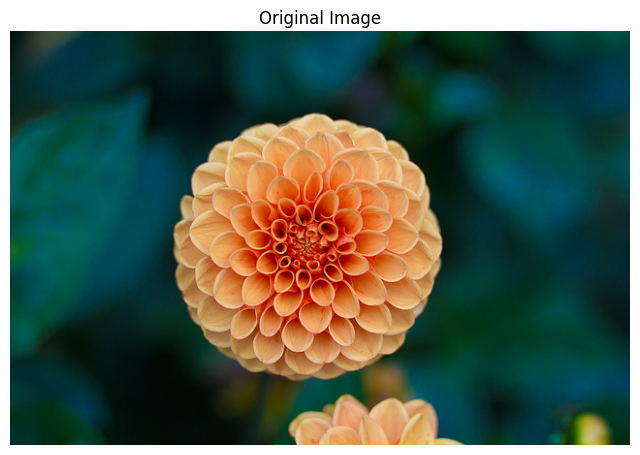

Applying K-means clustering...
Clustering completed in 0.07 seconds


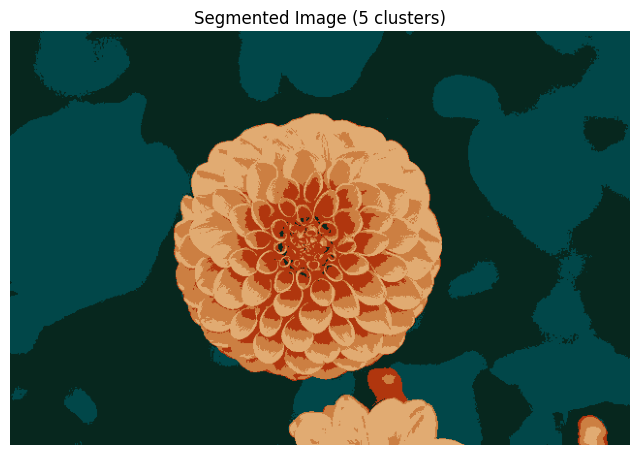

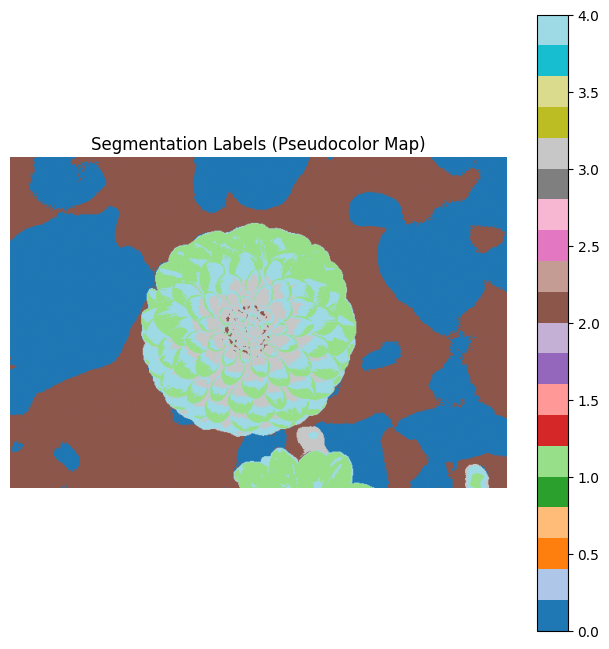

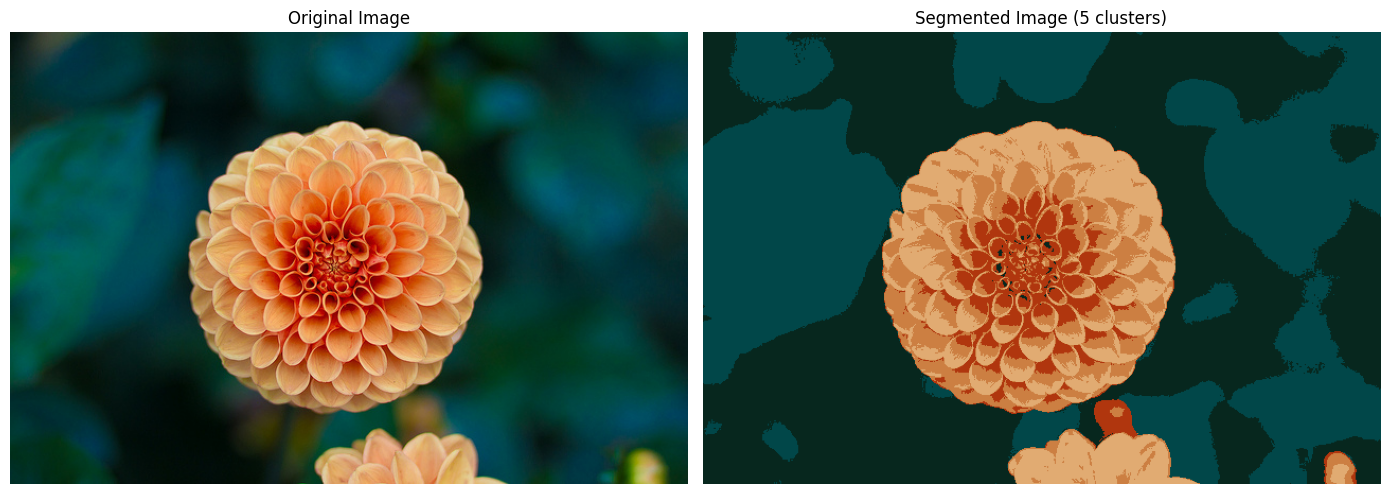


Comparing different numbers of clusters...
Applying K-means clustering...
Clustering completed in 0.01 seconds
Applying K-means clustering...
Clustering completed in 0.02 seconds
Applying K-means clustering...
Clustering completed in 0.02 seconds


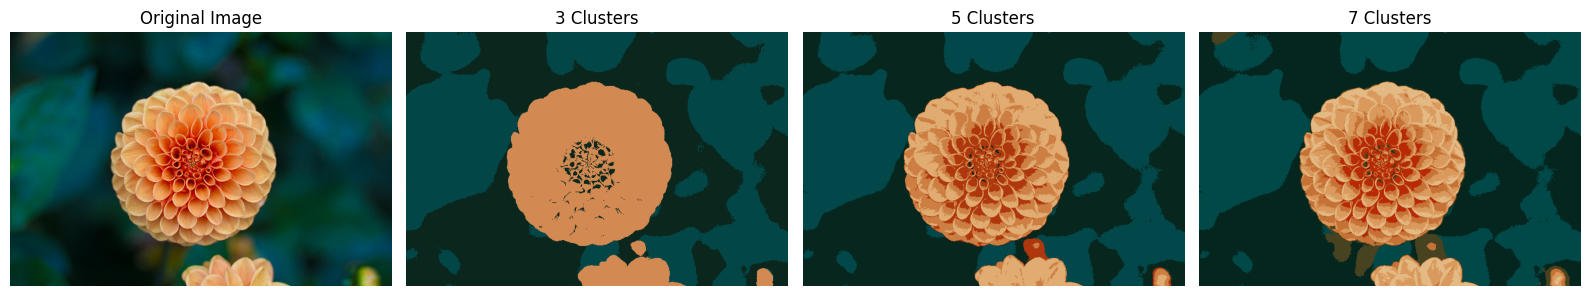

In [10]:
if __name__ == "__main__":
    main()